In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import scipy.io as sio
import torch
from tqdm import tqdm

In [26]:
#Read last hidden state vector generated by running DNABERT's prediction module
#results = torch.load('activationVectorsLastLayer_MBARC.pt', map_location=torch.device('cpu'))
results = torch.load('misclassificationsOnly.pt')

#print(results)

stacked_activation_vec = [results[0][2].detach().cpu().numpy().ravel()]
true_labels = [results[0][0][0]]
pred_labels = [np.argmax(results[0][1])]

print("\nlen before stacking")
print(len(stacked_activation_vec))

for i in tqdm(range(1, len(results))):
    stacked_activation_vec.append(results[i][2].detach().cpu().numpy().ravel())
    pred_labels.append(np.argmax(results[i][1]))
    true_labels.extend(results[i][0])
        

#print("\n len after stacking ")
#print(stacked_activation_vec.shape)
#X_new = stacked_activation_vec.reshape(4551, 57600)
#print("X_new : \n", X_new)

activationVec = []
#create a list of last 768 values from 1000 activation vectors
for i in range(len(stacked_activation_vec)):
    activationVec.append(stacked_activation_vec[i][74].tolist())

#print(activationVec)

#print(len(labels))


len before stacking
1


100%|██████████| 7931/7931 [00:01<00:00, 7121.09it/s]


In [23]:
stacked_activation_vec[0]

array([-0.67366755,  1.8087019 , -1.056068  , ..., -0.3696739 ,
        0.10146189,  0.47607428], dtype=float32)

In [8]:
# getting misclassified only

stacked_activation_vec = [results[0][2].ravel()]
true_labels = [results[0][0][0]]
pred_labels = [np.argmax(results[0][1])]


for i in tqdm(range(1, len(results))):
    if np.argmax(results[i][1]) != results[i][0]:
        stacked_activation_vec.append(results[i][2].ravel())
        pred_labels.append(np.argmax(results[i][1]))
        true_labels.extend(results[i][0])

100%|██████████| 1999/1999 [00:00<00:00, 71913.66it/s]


In [17]:
def v_stack_hidden_outputs(hidden_output):
    v_stacked_outputs = None
    for layer in hidden_output:
        if v_stacked_outputs is None:
            v_stacked_outputs = sample
        else:
            v_stacked_outputs = np.vstack((v_stacked_outputs, layer))
    return v_stacked_outputs

In [18]:
# v_stack_hidden_outputs(results[0][2]).shape

In [27]:
tsne = TSNE(n_components=2, verbose=1 ,perplexity= 30, n_iter=300)
tsne_results = tsne.fit_transform(stacked_activation_vec)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7932 samples in 0.841s...
[t-SNE] Computed neighbors for 7932 samples in 29.519s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7932
[t-SNE] Computed conditional probabilities for sample 2000 / 7932
[t-SNE] Computed conditional probabilities for sample 3000 / 7932
[t-SNE] Computed conditional probabilities for sample 4000 / 7932
[t-SNE] Computed conditional probabilities for sample 5000 / 7932
[t-SNE] Computed conditional probabilities for sample 6000 / 7932
[t-SNE] Computed conditional probabilities for sample 7000 / 7932
[t-SNE] Computed conditional probabilities for sample 7932 / 7932
[t-SNE] Mean sigma: 57.845877
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.338921
[t-SNE] KL divergence after 300 iterations: 2.794078


In [13]:
tsne_results

array([[-1.40835657e+01,  7.59141874e+00],
       [ 2.97431898e+00,  8.06361675e+00],
       [-1.36664705e+01,  6.80671740e+00],
       [-1.41566153e+01,  1.07806511e+01],
       [ 1.07832823e+01,  2.24568248e+00],
       [ 3.64999104e+00, -5.18974257e+00],
       [ 1.33818674e+00,  5.72591782e+00],
       [-7.34998465e-01,  8.44435245e-02],
       [ 5.95010090e+00, -4.27349758e+00],
       [-1.74647274e+01,  1.20076952e+01],
       [-5.89488792e+00, -6.42208052e+00],
       [-1.67746353e+01,  1.01961374e+01],
       [ 8.04988194e+00,  6.27172852e+00],
       [-9.85630226e+00,  3.60287261e+00],
       [ 2.63334727e+00, -1.18337221e+01],
       [-5.70807791e+00, -9.70543194e+00],
       [ 7.17858267e+00, -7.34462881e+00],
       [-4.26470995e+00,  8.83253574e+00],
       [-1.23938513e+01,  8.56422615e+00],
       [-5.44333792e+00,  6.97814178e+00],
       [-1.00563402e+01,  1.24744911e+01],
       [ 5.98589563e+00, -9.35118198e+00],
       [ 1.64412289e+01, -9.28713989e+00],
       [ 1.

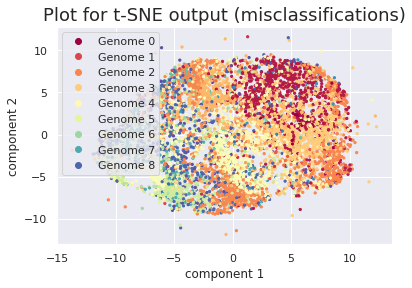

In [29]:
#apply t-SNE on activation vectors
#tsne = TSNE(n_components=2, verbose=1 ,perplexity= 30, n_iter=300)
#tsne_results = tsne.fit_transform(X_new)

#scatter plot - tSNE result



classes = []

for i in range(0, 27):
    classes.append(f'Genome {i}')

scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1],s= 5, c=true_labels, cmap='Spectral')
# apply legend()
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
#add labels to axis
plt.xlabel('component 1')
plt.ylabel('component 2')
#add title to the plot
plt.title('Plot for t-SNE output (misclassifications)', fontsize=18);
plt.show()

In [40]:
genome_labels = pd.read_csv('genome_to_id.tsv', sep='\t', header=None)

In [48]:
genome_labels_formatted = []

for label in genome_labels[1]:
    genome_labels_formatted.append(label.split('/')[-1][:-6])

In [64]:
genome_labels_formatted

['Clostridium_perfringensATCC_13124',
 'Clostridium_thermocellumVPI_7372_ATCC_27405',
 'Coraliomargarita_akajimensis_DSM_45221',
 'Corynebacterium_glutamicum_ATCC_13032',
 'Desulfosporosinus_acidiphilus_SJ4_DSM_22704',
 'Desulfosporosinus_meridiei_DSM_13257',
 'Desulfotomaculum_gibsoniae_DSM_7213',
 'Echinicola_vietnamensis_DSM_17526',
 'E.coli_K12_ATCC_700926',
 'Fervidobacterium_pennivorans_DSM_9078',
 'Frateuria_aurantia_DSM_6220',
 'Halovivax_ruber_XH-70',
 'Hirschia_baltica_ATCC_49814',
 'Meiothermus_silvanus_DSM_9946',
 'Natronobacterium_gregoryi_SP2',
 'Natronococcus_occultus_DSM_3396',
 'Nocardiopsis_dassonvillei_DSM_43111',
 'Olsenella_uli_DSM_7084',
 'Pseudomonas_stutzeri_RCH2',
 'Salmonella_bongori_NCTC_12419',
 'Salmonella_enterica_subsp._arizonae_serovar_62_z4_z23_-_strain_RSK2980',
 'Segniliparus_rotundus_DSM_44985',
 'Spirochaeta_smaragdinae_DSM_11293',
 'Streptococcus_pyogenes_M1_GAS',
 'Terriglobus_roseus_DSM_18391',
 'Thermobacillus_composti_KWC4']

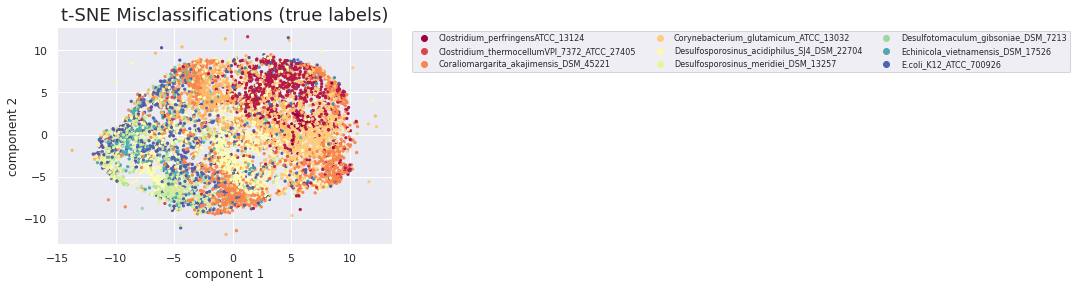

In [74]:
#apply t-SNE on activation vectors
#tsne = TSNE(n_components=2, verbose=1 ,perplexity= 30, n_iter=300)
#tsne_results = tsne.fit_transform(X_new)

#scatter plot - tSNE result



classes = []

for i in range(0, 27):
    classes.append(f'Genome {i}')

scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1],s= 5, c=true_labels, cmap='Spectral')
# apply legend()
plt.legend(handles=scatter.legend_elements()[0], labels=genome_labels_formatted, fontsize=8, ncol=3, bbox_to_anchor=(1.05, 1))
#add labels to axis
plt.xlabel('component 1')
plt.ylabel('component 2')
#add title to the plot
plt.title('t-SNE Misclassifications (true labels)', fontsize=18);
plt.show()

[0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 

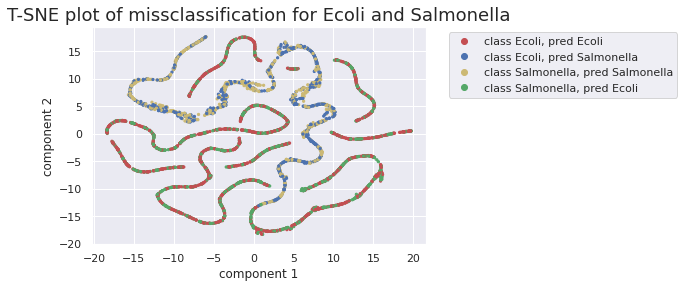

In [ ]:
from matplotlib.colors import ListedColormap

#scatter plot for missclassified data points in salmonella and Ecoli species
df_pred_lables = pd.read_csv ('/content/drive/MyDrive/DNA-BERT/CodeFiles/PredictedLabels_0and1.csv')
predicted_labels = df_pred_lables['Predictedvalue'].to_list()
print(predicted_labels)
missclassified_labels = []
x_cord = tsne_results[:,0]
y_cord = tsne_results[:,1]
print(type(x_cord))
print(type(y_cord))

#genearte a list of true and false ecoli and salmonella: true Ecoli = 0, false Salmonella = 1, true salmonella = 2, false Ecoli = 3
for i in range(len(predicted_labels)):
  if(predicted_labels[i] == 0 and labels[i] == 0):
    missclassified_labels.insert(i, 0)
  if(predicted_labels[i] == 1 and labels[i] == 0):
    missclassified_labels.insert(i, 1)
  if(predicted_labels[i] == 1 and labels[i] == 1):
    missclassified_labels.insert(i, 2)
  if(predicted_labels[i] == 0 and labels[i] == 1):
    missclassified_labels.insert(i, 3)
print(missclassified_labels)

#scatter plot for above list of labels
colors = ListedColormap(['r','b','y','g'])
scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1],s= 5, c=missclassified_labels, cmap=colors)
#apply legend
classes = ['class Ecoli, pred Ecoli', 'class Ecoli, pred Salmonella', 'class Salmonella, pred Salmonella', 'class Salmonella, pred Ecoli']
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=classes, bbox_to_anchor=(1.05, 1.0), loc='upper left')
#add labels to axis
plt.xlabel('component 1')
plt.ylabel('component 2')
#add title to the plot
plt.title('T-SNE plot of missclassification for Ecoli and Salmonella', fontsize=18);
plt.show()



In [ ]:
#apply k-means on above t-SNE results
kmeans = KMeans(2)
kmeans.fit(tsne_results)
identified_clusters = kmeans.fit_predict(tsne_results)
identified_clusters

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

       feature1   feature2  Clusters  labels
0     10.020258 -13.104659         0       0
1      7.350906  14.811833         1       0
2     -2.735339  -5.934649         0       0
3      0.146479  15.727703         1       0
4     14.422793   3.500297         0       0
...         ...        ...       ...     ...
4546  -1.765704  -1.228492         1       0
4547   6.314482  -5.125347         0       0
4548 -18.355145   0.769423         1       1
4549   9.772511   0.269868         0       1
4550 -14.955395   6.264381         1       1

[4551 rows x 4 columns]


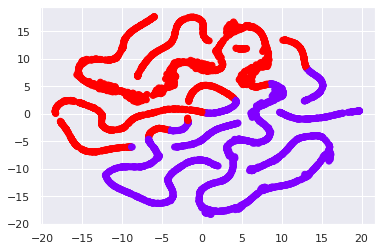

In [ ]:
#create a dataframe with tSNE results and assigned cluster
data_with_clusters = pd.DataFrame(data = tsne_results, columns=['feature1', 'feature2'])
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters['labels'] = labels
print(data_with_clusters)

#scatter plot for t-SNE and k-means o/p
plt.scatter(data_with_clusters['feature1'], data_with_clusters['feature2'], c=data_with_clusters['Clusters'], cmap='rainbow')

In [ ]:
#apply k-means clustering with k =2  on activation vector
kmeans = KMeans(2)
kmeans.fit(activationVec)
identified_clusters = kmeans.fit_predict(activationVec)
identified_clusters

#create a dataframe with activation vector, clusters and labels
df_act_vector_cluster = pd.DataFrame(data = identified_clusters, columns=['cluster'])
df_act_vector_cluster['labels'] = labels
print(df_act_vector_cluster)

#print the count of each labels (class 0 and class 1) in each cluster
count_clus0_label1 = 0
count_clus0_label0 = 0
count_clus1_label1 = 0
count_clus1_label0 = 0

for index, rows in df_act_vector_cluster.iterrows():
    if rows['cluster'] == 0 and  rows['labels'] == 1:
        count_clus0_label1+=1
    elif rows['cluster'] == 0 and  rows['labels'] == 0:
        count_clus0_label0+=1
    if rows['cluster'] == 1 and  rows['labels'] == 1:
        count_clus1_label1+=1
    elif rows['cluster'] == 1 and  rows['labels'] == 0:
        count_clus1_label0+=1

print("\nCluster 0 label 1 -->", count_clus0_label1)
print("\nCluster 0 label 0 -->", count_clus0_label0)
print("\nCluster 1 label 1 -->", count_clus1_label1)
print("\nCluster 1 label 0 -->", count_clus1_label0)

      cluster  labels
0           1       0
1           1       0
2           0       0
3           0       0
4           0       0
...       ...     ...
4546        0       0
4547        1       0
4548        0       1
4549        0       1
4550        1       1

[4551 rows x 2 columns]

Cluster 0 label 1 --> 762

Cluster 0 label 0 --> 1043

Cluster 1 label 1 --> 1418

Cluster 1 label 0 --> 1328


In [ ]:
#updating input for k-means
selected_cluster = 0
X_new_copy = np.copy(activationVec)
df_act_vector_cluster_updated = df_act_vector_cluster.copy()
print("\npredicted labels output -->", predicted_labels)
df_act_vector_cluster_updated['PredLabels'] = predicted_labels
rowList = []
print(len(X_new_copy))

for index, row in df_act_vector_cluster.iterrows():
    if row['cluster'] != selected_cluster:
        rowList.append(index)
        df_act_vector_cluster_updated.drop(index , inplace=True)
updatedVec = np.delete(X_new_copy, rowList, 0)


print("\nUpdated clustering assignment\n", df_act_vector_cluster_updated)
df_act_vector_cluster_updated.to_csv('/content/drive/MyDrive/DNA-BERT/CodeFiles/testCountMissclassification.csv')

"""
print(len(updatedVec))
print(updatedVec)
print(len(df_act_vector_cluster_updated))
print(df_act_vector_cluster_updated)
"""


#applying k-means on activation vectors selected above i.e updatedVec
kmeans = KMeans(n_clusters = 5)
kmeans.fit(updatedVec)
identified_clusters = kmeans.fit_predict(updatedVec)
df_act_vector_cluster_updated['cluster'] = identified_clusters
df_act_vector_cluster_updated.reset_index(inplace=True)

print("\nactivation vector size-->",updatedVec.shape)

print("\nUpdated clustering assignment\n", df_act_vector_cluster_updated)
df_act_vector_cluster_updated.to_csv('/content/drive/MyDrive/DNA-BERT/CodeFiles/testCountMissclassificationAfterClustering.csv')

#get count of label 1  and  label 0 in each cluster
label0Count = [0]* 10
label1Count = [0]* 10

for index, rows in df_act_vector_cluster_updated.iterrows():
    if rows['labels'] == 1:
        label1Count[rows['cluster']]+=1
    elif rows['labels'] == 0:
        label0Count[rows['cluster']]+=1

print("\nList of Count of seq  with label 1 -->", label1Count)
print("\nCount of seq  with label 1 -->", sum(label1Count))
print("\nList of Count of seq  with label 0 -->", label0Count)
print("\nCount of seq  with label 0 -->", sum(label0Count))


predicted labels output --> [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0

In [ ]:
#calculate euclidean distance between means of each cluster
cluster1 = 1
listofClusterMeans =  kmeans.cluster_centers_
print(listofClusterMeans)

#calculate euclidean distance between 2 means
for i in range(5):
  cluster2 = i
  dist = np.linalg.norm(listofClusterMeans[cluster1] - listofClusterMeans[cluster2])
  print("Distance between cluster 1 and", i, "mean:", dist)

print("\n\n")

cluster1 = 0
listofClusterMeans =  kmeans.cluster_centers_
#calculate euclidean distance between 2 means
for i in range(5):
  cluster2 = i
  dist = np.linalg.norm(listofClusterMeans[cluster1] - listofClusterMeans[cluster2])
  print("Distance between cluster 0 and", i, "mean:", dist)

print("\n\n")

cluster1 = 2
listofClusterMeans =  kmeans.cluster_centers_
#calculate euclidean distance between 2 means
for i in range(5):
  cluster2 = i
  dist = np.linalg.norm(listofClusterMeans[cluster1] - listofClusterMeans[cluster2])
  print("Distance between cluster 2 and", i, "mean:", dist)
print("\n\n")


cluster1 = 3
listofClusterMeans =  kmeans.cluster_centers_
#calculate euclidean distance between 2 means
for i in range(5):
  cluster2 = i
  dist = np.linalg.norm(listofClusterMeans[cluster1] - listofClusterMeans[cluster2])
  print("Distance between cluster 3 and", i, "mean:", dist)
print("\n\n")


cluster1 = 4
listofClusterMeans =  kmeans.cluster_centers_
#calculate euclidean distance between 2 means
for i in range(5):
  cluster2 = i
  dist = np.linalg.norm(listofClusterMeans[cluster1] - listofClusterMeans[cluster2])
  print("Distance between cluster 4 and", i, "mean:", dist)
print("\n\n")

[[-0.40868051 -0.4400787   0.09358804 ... -0.07324254  0.13453034
   0.08287487]
 [-0.3552804  -0.39206668  0.05598083 ... -0.03594868  0.16762455
   0.10960531]
 [-0.37163178 -0.41263611  0.06922198 ... -0.05018756  0.15767279
   0.09992833]
 [-0.42609567 -0.45094222  0.10597628 ... -0.08198709  0.12140263
   0.07829456]
 [-0.39011011 -0.42794127  0.08146709 ... -0.06259538  0.14661235
   0.09016098]]
Distance between cluster 1 and 0 mean: 1.596758113708637
Distance between cluster 1 and 1 mean: 0.0
Distance between cluster 1 and 2 mean: 0.5413330255516416
Distance between cluster 1 and 3 mean: 2.1076608308901217
Distance between cluster 1 and 4 mean: 1.0740211339820689



Distance between cluster 0 and 0 mean: 0.0
Distance between cluster 0 and 1 mean: 1.596758113708637
Distance between cluster 0 and 2 mean: 1.0649037716958594
Distance between cluster 0 and 3 mean: 0.524170126895401
Distance between cluster 0 and 4 mean: 0.5311639195674941



Distance between cluster 2 and 0 mean: 1.

In [ ]:
#calculate mean separately  label 1 and label 0 vectors for given cluster

def calculateLabel0andLabel1Means(clusterNo):
    print(len(updatedVec))
    print(len(df_act_vector_cluster_updated.index))


    updatedVecCopy = np.copy(updatedVec)
    df_act_vector_cluster_updatedCopy =  df_act_vector_cluster_updated.copy()
    df_act_vector_cluster_updatedCopy = df_act_vector_cluster_updatedCopy.drop('index', axis=1)
    print("\ndataframe used -->\n", df_act_vector_cluster_updatedCopy)
    rowList = []
    clusterNum = clusterNo


    #create activation vector for given cluster and label 0
    #delete activation vector not for given cluster
    for index, row in df_act_vector_cluster_updatedCopy.iterrows():
        if row['cluster'] != clusterNum :
            rowList.append(index)
            df_act_vector_cluster_updatedCopy.drop(index , inplace=True)
    activationVectorLabel0 = np.delete(updatedVecCopy, rowList, 0)
     #delete activation vector for label = 1
    for index, row in df_act_vector_cluster_updatedCopy.iterrows():
        if row['labels'] == 1 :
            rowList.append(index)
            df_act_vector_cluster_updatedCopy.drop(index , inplace=True)
    activationVectorLabel0 = np.delete(updatedVecCopy, rowList, 0)

    print("\nlen of activation vector label 0-->", len(activationVectorLabel0))



    #write activation vector for label 0 to a file
    np.savetxt(f"/content/drive/MyDrive/DNA-BERT/CodeFiles/Cluster4Label0.txt", activationVectorLabel0)

    #read from the file
    data = np.loadtxt("/content/drive/MyDrive/DNA-BERT/CodeFiles/Cluster4Label0.txt")
    print("\nshape of activation vector written to file Label 0-->", data.shape)

    print("\nLen of predicted values Label 0 --->", len(df_act_vector_cluster_updatedCopy.PredLabels))

    #write predicted values to a file
    np.savetxt(r'/content/drive/MyDrive/DNA-BERT/CodeFiles/PredictedCluster4Label0.txt', df_act_vector_cluster_updatedCopy.PredLabels, fmt='%d')




    meanLabel0 = np.mean(activationVectorLabel0, axis=0)
    print(len(meanLabel0))



    #reset values for "df_act_vector_cluster_updatedCopy", "updatedVecCopy", "rowlist"
    updatedVecCopy = np.copy(updatedVec)
    df_act_vector_cluster_updatedCopy =  df_act_vector_cluster_updated.copy()
    df_act_vector_cluster_updatedCopy = df_act_vector_cluster_updatedCopy.drop('index', axis=1)
    rowList = []


    #create activation vector for given cluster and label 1
    #delete activation vector not for given cluster
    for index, row in df_act_vector_cluster_updatedCopy.iterrows():
        if row['cluster'] != clusterNum :
            rowList.append(index)
            df_act_vector_cluster_updatedCopy.drop(index , inplace=True)
    activationVectorLabel1 = np.delete(updatedVecCopy, rowList, 0)
    #delete activation vector for label = 0
    for index, row in df_act_vector_cluster_updatedCopy.iterrows():
        if row['labels'] == 0 :
            rowList.append(index)
            df_act_vector_cluster_updatedCopy.drop(index , inplace=True)
    activationVectorLabel1 = np.delete(updatedVecCopy, rowList, 0)

    print("len of activation vector label 1 -->", len(activationVectorLabel1))


    #write activation vector for label 0 to a file
    np.savetxt(f"/content/drive/MyDrive/DNA-BERT/CodeFiles/Cluster4Label1.txt", activationVectorLabel1)

    #read from the file
    data = np.loadtxt("/content/drive/MyDrive/DNA-BERT/CodeFiles/Cluster4Label1.txt")
    print("\nshape of activation vector written to file Label 1-->", data.shape)

    #write predicted values to a file
    print("\nLen of predicted values Label 1 --->", len(df_act_vector_cluster_updatedCopy.PredLabels))
    np.savetxt(r'/content/drive/MyDrive/DNA-BERT/CodeFiles/PredictedCluster4Label1.txt', df_act_vector_cluster_updatedCopy.PredLabels, fmt='%d')




    meanLabel1 = np.mean(activationVectorLabel1, axis=0)
    print(len(meanLabel1))

    #calculate the distance between the means for Label 0 and Label 1
    dist = np.linalg.norm(meanLabel0 - meanLabel1)
    print("Distance between Label 0 and Label 1 means for cluster",clusterNum,":",dist)

    return [meanLabel0, meanLabel1];

In [ ]:
calculateLabel0andLabel1Means(4)

1805
1805

dataframe used -->
       cluster  labels  PredLabels
0           4       0           0
1           2       0           0
2           2       0           0
3           3       0           0
4           2       0           0
...       ...     ...         ...
1800        4       1           0
1801        0       0           0
1802        3       0           0
1803        0       1           0
1804        1       1           0

[1805 rows x 3 columns]

len of activation vector label 0--> 197

shape of activation vector written to file Label 0--> (197, 768)

Len of predicted values Label 0 ---> 197
768
len of activation vector label 1 --> 136

shape of activation vector written to file Label 1--> (136, 768)

Len of predicted values Label 1 ---> 136
768
Distance between Label 0 and Label 1 means for cluster 4 : 0.01872286708491692


[array([-3.90372289e-01, -4.28129883e-01,  8.16406336e-02,  8.25188738e-01,
        -8.36646923e-02, -3.77428711e-01,  5.63765951e-02, -1.00025261e-01,
         5.92501675e-02,  5.26666747e-01, -1.17348115e-01,  1.60999605e-01,
         3.75507777e-03,  2.43081273e-01,  3.37886076e-01, -9.75141846e-02,
        -2.27862444e-01, -7.43822274e+00, -9.81461851e-02, -4.37833124e-01,
        -1.36406223e-01,  6.95633386e-02, -3.86251684e-01, -7.91336895e-03,
        -2.39399333e-01, -5.19006998e-02, -1.83520508e-03, -9.79577178e-02,
        -2.90389001e-02,  6.26617213e-02,  6.78076199e-01, -6.27617074e-01,
         8.49255357e-01,  4.50497972e-02,  5.98571281e-01,  4.33634323e-02,
         2.63717445e-01,  6.67401723e-02, -4.09721070e-01,  2.13537201e-01,
         5.76826395e-02, -2.58152610e-01, -4.05627673e-01,  6.41818875e-02,
        -4.26234547e-01,  4.85878489e-02, -4.37466405e-02, -4.38839061e-03,
         5.71152495e-02,  1.24233476e-01,  1.33071605e+00, -2.78530909e-02,
         3.2

In [ ]:
#compute means seperately for label0 and label1 for cluster 0
listLabel = calculateLabel0andLabel1Means(0)
meanLabel0Cluster0 = listLabel[0]
meanLabel1Cluster0 = listLabel[1]
print("len of label 0 mean cluster 0:", len(meanLabel0Cluster0))
print("len of label 1 mean cluster 0:", len(meanLabel0Cluster0))

#compute means seperately for label0 and label1 for cluster 1
listLabel = calculateLabel0andLabel1Means(1)
meanLabel0Cluster1 = listLabel[0]
meanLabel1Cluster1 = listLabel[1]
print("len of label 0 mean cluster 1:", len(meanLabel0Cluster1))
print("len of label 1 mean cluster 1:", len(meanLabel1Cluster1))


#compute means seperately for label0 and label1 for cluster 2
listLabel = calculateLabel0andLabel1Means(2)
meanLabel0Cluster2 = listLabel[0]
meanLabel1Cluster2 = listLabel[1]
print("len of label 0 mean cluster 2:", len(meanLabel0Cluster2))
print("len of label 1 mean cluster 2:", len(meanLabel1Cluster2))

#compute means seperately for label0 and label1 for cluster 3
listLabel = calculateLabel0andLabel1Means(3)
meanLabel0Cluster3 = listLabel[0]
meanLabel1Cluster3 = listLabel[1]
print("len of label 0 mean cluster 3:", len(meanLabel0Cluster3))
print("len of label 1 mean cluster 3:", len(meanLabel1Cluster3))

#compute means seperately for label0 and label1 for cluster 4
listLabel = calculateLabel0andLabel1Means(4)
meanLabel0Cluster4 = listLabel[0]
meanLabel1Cluster4 = listLabel[1]
print("len of label 0 mean cluster 4:", len(meanLabel0Cluster4))
print("len of label 1 mean cluster 4:", len(meanLabel1Cluster4))

1805
1805

dataframe used -->
       cluster  labels  PredLabels
0           4       0           0
1           2       0           0
2           2       0           0
3           3       0           0
4           2       0           0
...       ...     ...         ...
1800        4       1           0
1801        0       0           0
1802        3       0           0
1803        0       1           0
1804        1       1           0

[1805 rows x 3 columns]

len of activation vector label 0--> 208

shape of activation vector written to file Label 0--> (208, 768)

Len of predicted values Label 0 ---> 208
768
len of activation vector label 1 --> 175

shape of activation vector written to file Label 1--> (175, 768)

Len of predicted values Label 1 ---> 175
768
Distance between Label 0 and Label 1 means for cluster 0 : 0.026393368645301285
len of label 0 mean cluster 0: 768
len of label 1 mean cluster 0: 768
1805
1805

dataframe used -->
       cluster  labels  PredLabels
0           4  

In [ ]:
#loop through Label 1 and Label 0  vectors for all cluster and calculate difference between values at each position.
def calculateDiffBetweenMeans(mean0, mean1, clusterNum):
  for i in range(len(mean1)):
    if(abs(mean0[i] - mean1[i]) > 0.005):
      #print(i)
      print("cluster", clusterNum," position", i, "has distance", abs(mean0[i] - mean1[i])," label 0 mean is" ,mean0[i], "label 1 mean is", mean1[i])


#Loop through mean vector for Label 0 and Label 1 and calculate difference.
calculateDiffBetweenMeans(meanLabel0Cluster0, meanLabel1Cluster0, 0)
calculateDiffBetweenMeans(meanLabel0Cluster1, meanLabel1Cluster1, 1)
calculateDiffBetweenMeans(meanLabel0Cluster2, meanLabel1Cluster2, 2)
calculateDiffBetweenMeans(meanLabel0Cluster3, meanLabel1Cluster3, 3)
calculateDiffBetweenMeans(meanLabel0Cluster4, meanLabel1Cluster4, 4)

cluster 0  position 156 has distance 0.00511439498309274  label 0 mean is 3.0309354949455996 label 1 mean is 3.025821099962507
cluster 0  position 241 has distance 0.0054301854333543564  label 0 mean is 0.15583963613384044 label 1 mean is 0.1612698215671948
cluster 0  position 566 has distance 0.005522979969506903  label 0 mean is -1.1065352398615618 label 1 mean is -1.1010122598920549
cluster 0  position 691 has distance 0.005861192116370706  label 0 mean is -2.2445069459768443 label 1 mean is -2.2386457538604736


In [ ]:
#Loop through means and calculate the difference in value at each position for mean vectors from different cluster
def calculateDiffBetweenMeansInterCluster(mean0, mean1, clus0, clus1):
  for i in range(len(mean1)):
    if(abs(mean0[i] - mean1[i]) > 0.05):
      print(" position", i, "has difference", abs(mean0[i] - mean1[i]),", cluster", clus0," mean is", mean0[i], "and cluster", clus1, "mean is", mean1[i])

#calculate difference for same labels of different cluster
print("\nDiff between Label 0 for cluster 0 and cluster 1 :")
calculateDiffBetweenMeansInterCluster(meanLabel0Cluster0, meanLabel0Cluster1, 0, 1)
print("\nDiff between Label 1 for cluster 0 and cluster 1 :")
calculateDiffBetweenMeansInterCluster(meanLabel1Cluster0, meanLabel1Cluster1, 0, 1)


Diff between Label 0 for cluster 0 and cluster 1 :
 position 0 has distance 0.052821304578502704 , cluster 0  mean is -0.40826718150996244 and cluster 1 mean is -0.35544587693145974
 position 3 has distance 0.0828702763987127 , cluster 0  mean is 0.8508767585914868 and cluster 1 mean is 0.7680064821927741
 position 9 has distance 0.05053523104167573 , cluster 0  mean is 0.5410502994289765 and cluster 1 mean is 0.4905150683873008
 position 17 has distance 0.2487604524727729 , cluster 0  mean is -7.352422042534902 and cluster 1 mean is -7.6011824950076745
 position 29 has distance 0.06258670427813512 , cluster 0  mean is 0.08661845702534685 and cluster 1 mean is 0.02403175274721173
 position 30 has distance 0.1435498232155611 , cluster 0  mean is 0.6342109031975269 and cluster 1 mean is 0.777760726413088
 position 31 has distance 0.05993107250553309 , cluster 0  mean is -0.6513920214313728 and cluster 1 mean is -0.5914609489258397
 position 46 has distance 0.0756675050631875 , cluster 0

In [ ]:
#compare the mean vectors of label 0 cluster 0 vs. label 1 cluster 1, and label 1 cluster 0 vs. label 0 cluster 1
print("\nDiff between Label 0 cluster 0 and Label 1 cluster 1 :")
calculateDiffBetweenMeansInterCluster(meanLabel0Cluster0, meanLabel1Cluster1, 0, 1)
print("\nDiff between Label 1 cluster 0 and Label 0 cluster 1 :")
calculateDiffBetweenMeansInterCluster(meanLabel1Cluster0, meanLabel0Cluster1, 0, 1)


Diff between Label 0 cluster 0 and Label 1 cluster 1 :
 position 0 has distance 0.05328752027332384 , cluster 0  mean is -0.40826718150996244 and cluster 1 mean is -0.3549796612366386
 position 3 has distance 0.08391377995893301 , cluster 0  mean is 0.8508767585914868 and cluster 1 mean is 0.7669629786325538
 position 9 has distance 0.051299213401250654 , cluster 0  mean is 0.5410502994289765 and cluster 1 mean is 0.4897510860277259
 position 17 has distance 0.25136526354579214 , cluster 0  mean is -7.352422042534902 and cluster 1 mean is -7.603787306080694
 position 26 has distance 0.05004985616406127 , cluster 0  mean is 0.012524425567020304 and cluster 1 mean is -0.037525430597040964
 position 29 has distance 0.0632786242325594 , cluster 0  mean is 0.08661845702534685 and cluster 1 mean is 0.023339832792787448
 position 30 has distance 0.14554508772233254 , cluster 0  mean is 0.6342109031975269 and cluster 1 mean is 0.7797559909198595
 position 31 has distance 0.06031406552197549 ,

In [ ]:
#function to calculate std. deviation for all the activations
import numpy as np
def calculateStdDev(activationVec):
  stdDev = np.std(activationVec, axis=0 )
  return stdDev

#call std. deviation function
resultStdDev = calculateStdDev(updatedVec)
print(len(resultStdDev))
print(resultStdDev)

768
[0.02586122 0.02106055 0.01799965 0.03917354 0.00798605 0.0032343
 0.00292838 0.01361004 0.01212224 0.02306933 0.00504436 0.01296153
 0.0116903  0.0095617  0.00395158 0.00882458 0.00854221 0.12495328
 0.00596334 0.01621306 0.01494225 0.01795568 0.00555899 0.00682076
 0.00408488 0.00713607 0.0228736  0.00362804 0.01505208 0.03277511
 0.06810271 0.03256148 0.0220668  0.0200641  0.01219336 0.00201305
 0.00131457 0.00950245 0.00712557 0.01774379 0.01411234 0.01363308
 0.00467244 0.00312899 0.02430067 0.01040287 0.03413699 0.00401861
 0.02045306 0.00919429 0.06069082 0.00893662 0.01336389 0.01800132
 0.01222775 0.01012268 0.00688111 0.00376754 0.00687986 0.00722352
 0.02830138 0.00484403 0.00959507 0.00927378 0.02563363 0.02529514
 0.00336377 0.03055332 0.00586935 0.0212604  0.0357259  0.03196046
 0.00205059 0.00201151 0.00965453 0.02335568 0.01770081 0.01039473
 0.01094005 0.04217313 0.0139576  0.01173574 0.01576959 0.01880757
 0.00713821 0.1128211  0.03146169 0.04206286 0.00372898 0.0

In [ ]:
#calculate incorrectly classified sequences in each of the above cluster
df_act_vector_cluster_updated
missclassifiedCuster0 = 0
missclassifiedCuster1 = 0
missclassifiedCuster2 = 0
missclassifiedCuster3 = 0
missclassifiedCuster4 = 0

for index, rows in df_act_vector_cluster_updated.iterrows():
  if rows['cluster'] == 0:
    if rows['labels'] != rows['PredLabels']:
      missclassifiedCuster0 += 1
  if rows['cluster'] == 1:
    if rows['labels'] != rows['PredLabels']:
      missclassifiedCuster1 +=  1
  if rows['cluster'] == 2:
    if rows['labels'] != rows['PredLabels']:
      missclassifiedCuster2 +=  1
  if rows['cluster'] == 3:
    if rows['labels'] != rows['PredLabels']:
      missclassifiedCuster3 += 1
  if rows['cluster'] == 4:
    if rows['labels'] != rows['PredLabels']:
      missclassifiedCuster4 +=  1

print("\nCluster 0 incorrect classi count -->", missclassifiedCuster0)
print("\nCluster 1 incorrect classi count -->", missclassifiedCuster1)
print("\nCluster 2 incorrect classi count -->", missclassifiedCuster2)
print("\nCluster 3 incorrect classi count -->", missclassifiedCuster3)
print("\nCluster 4 incorrect classi count -->", missclassifiedCuster4)


Cluster 0 incorrect classi count --> 115

Cluster 1 incorrect classi count --> 136

Cluster 2 incorrect classi count --> 182

Cluster 3 incorrect classi count --> 154

Cluster 4 incorrect classi count --> 175


      index  cluster  labels  PredLabels
0         2        2       0           0
1         3        1       0           0
2         4        1       0           0
3         7        3       0           0
4         8        1       0           0
...     ...      ...     ...         ...
1800   4542        2       1           0
1801   4545        0       0           0
1802   4546        3       0           0
1803   4548        0       1           0
1804   4549        4       1           0

[1805 rows x 4 columns]

 len(tSNEInputSelClus) 340

 len(labels) 340
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 340 samples in 0.001s...
[t-SNE] Computed neighbors for 340 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 340 / 340
[t-SNE] Mean sigma: 0.017295


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.457970
[t-SNE] KL divergence after 300 iterations: 0.211304


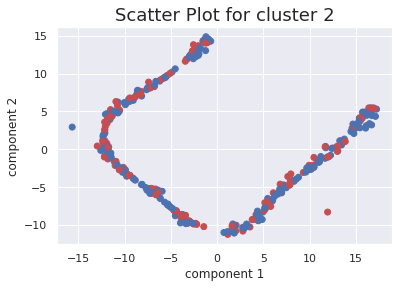

In [ ]:
#create a dataframe of a cluster that you want to plot.
plotClusterNum = 2
tSNEInput = np.copy(updatedVec)
rowList = []
labelsCol = []
#df_act_vector_cluster_updated = df_act_vector_cluster_updated.reset_index()
print(df_act_vector_cluster_updated)

for index, row in df_act_vector_cluster_updated.iterrows():
    if row['cluster'] != plotClusterNum:
        rowList.append(index)
    elif row['cluster'] == plotClusterNum and row['labels'] == 0:
        labelsCol.append('b')
    elif row['cluster'] == plotClusterNum and row['labels'] == 1:
        labelsCol.append('r')


tSNEInputSelClus = np.delete(tSNEInput, rowList, 0)
print("\n len(tSNEInputSelClus)", len(tSNEInputSelClus))
print("\n len(labels)", len(labelsCol))

#apply t-SNE to visualize in 2d
tsne = TSNE(n_components=2, verbose=1 ,perplexity= 30, n_iter=300)
tsne_results = tsne.fit_transform(tSNEInputSelClus)


#print("tsne_results -->", tsne_results)


#scatter plot - tSNE result
classes = ['Label 0', 'Label 1']
scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labelsCol)
# apply legend()
#plt.legend(handles=scatter.legend_elements()[0], labels=classes)
#add labels to axis
plt.xlabel('component 1')
plt.ylabel('component 2')
#add title to the plot
plt.title('Scatter Plot for cluster 2', fontsize=18);
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2746 samples in 0.002s...
[t-SNE] Computed neighbors for 2746 samples in 0.413s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2746
[t-SNE] Computed conditional probabilities for sample 2000 / 2746
[t-SNE] Computed conditional probabilities for sample 2746 / 2746
[t-SNE] Mean sigma: 0.008898
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.307884
[t-SNE] KL divergence after 300 iterations: 0.819628
len of t-SNE column --> 2746

        index  cluster  labels  PredLabels marker  component0  component1  \
0         0        4       0           0      x   -1.855042  -11.031409   
1         1        0       0           1      x    2.526721   10.468072   
2         5        0       1           1      +    3.620039    6.632922   
3         6        0       0           1      x   -1.939056   16.749475   
4         9        0       1           1      +   -5.485274   10.353868   
...     ...      ..

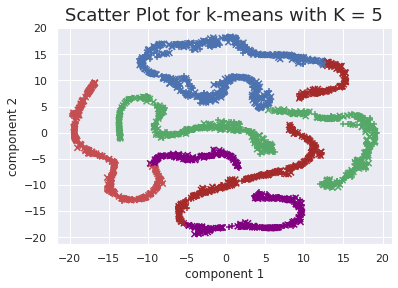

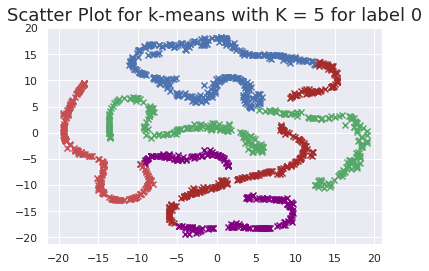

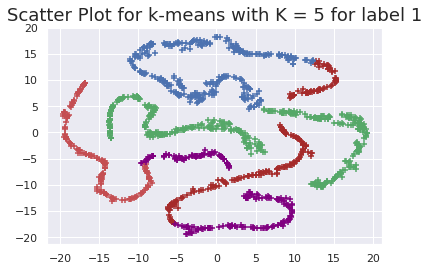

In [ ]:
#Scatter plot for K-means with k = 5
#print(df_act_vector_cluster_updated)
tsne = TSNE(n_components=2, verbose=1 ,perplexity= 30, n_iter=300)
tsne_results = tsne.fit_transform(updatedVec)
markerList = []
labelCol = []


for index, row in df_act_vector_cluster_updated.iterrows():
    if(row['labels'] == 0):
        markerList.append("x")
    elif(row['labels'] == 1):
        markerList.append("+")
    if (row['cluster'] == 0):
        labelCol.append('b')
    elif (row['cluster'] == 1):
        labelCol.append('r')
    elif (row['cluster'] == 2):
        labelCol.append('g')
    elif (row['cluster'] == 3):
        labelCol.append("purple")
    elif (row['cluster'] == 4):
        labelCol.append("brown")

df_act_vector_cluster_updated['marker'] = markerList
print("len of t-SNE column -->", len(tsne_results[:,0]))
df_act_vector_cluster_updated['component0'] = tsne_results[:,0]
df_act_vector_cluster_updated['component1'] = tsne_results[:,1]
df_act_vector_cluster_updated['labelCol'] = labelCol
print("\n ", df_act_vector_cluster_updated)


df_act_vector_cluster_updated_sort = df_act_vector_cluster_updated.sort_values(['labels'],ascending=False)
print("new df-- >", df_act_vector_cluster_updated_sort)
for marker, d in df_act_vector_cluster_updated_sort.groupby('marker'):
     plt.scatter(d['component0'], d['component1'], c=d['labelCol'], marker=marker, label=marker)

df_act_vector_cluster_updated_sort.to_csv('/content/drive/MyDrive/DNA-BERT/CodeFiles/KmeansResults.csv')

centers = kmeans.cluster_centers_
print("\n centers")
print(centers)

# apply legend()
#plt.legend()
#add labels to axis
plt.xlabel('component 1')
plt.ylabel('component 2')
#add title to the plot
plt.title('Scatter Plot for k-means with K = 5', fontsize=18);
plt.show()


#scatter plot for points with label 0
for index, row in df_act_vector_cluster_updated.loc[df_act_vector_cluster_updated['labels'] == 0].iterrows():
    plt.scatter(row['component0'], row['component1'], c=row['labelCol'], marker=row['marker'], label=row['marker'])
plt.title('Scatter Plot for k-means with K = 5 for label 0', fontsize=18);
plt.show()



#scatter plot for  with label 0
for index, row in df_act_vector_cluster_updated.loc[df_act_vector_cluster_updated['labels'] == 1].iterrows():
    plt.scatter(row['component0'], row['component1'], c=row['labelCol'], marker=row['marker'], label=row['marker'])
plt.title('Scatter Plot for k-means with K = 5 for label 1', fontsize=18);
plt.show()


In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.6 MB/s 
     |████████████████████████████████| 1.1 MB 16.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=953240e53de98585c7be86f81e8c6b0112d74068377716fe4c2ccd948d125076
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=888899413b4050265787aa1d668d85ab4a9b3b8f45a9fdae3602dba2017f5e58
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


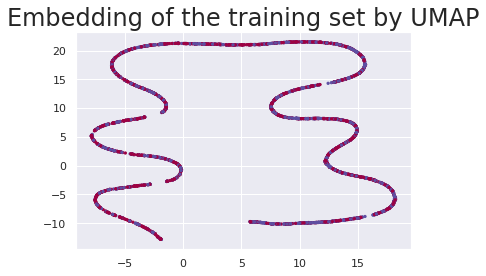

In [ ]:
#Compute and plot UMAP
import umap

trans = umap.UMAP(n_neighbors=50, random_state=42).fit(X_new)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=labels, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [ ]:
from sklearn.decomposition import PCA
principal=PCA(n_components=2)
principal.fit(X_new)
x_tranformed=principal.transform(X_new)
#scatter plot for 2 components
plt.figure(figsize=(6,6))
plt.scatter(x_tranformed[:,0],x_tranformed[:,1],s= 5, c=labels, cmap='Spectral')
plt.xlabel('pc1')
plt.ylabel('pc2')

NameError: ignored

Text(0, 0.5, 'pc2')

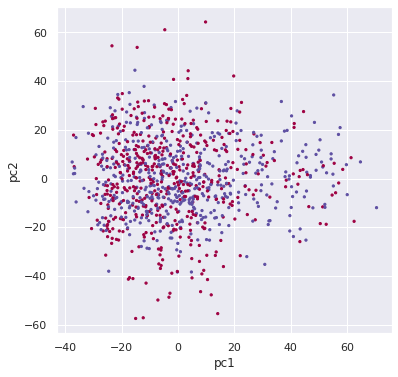